In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss #/ number of samples

# one hot encoding label
# Y must be one hot encoded for each class
# class 0: [1,0,0]
# class 1: [0,1,0]
Y = np.array([1,0,0])

Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)

print(f'Loss 1 numpy:{l1:.4f}')
print(f'Loss 2 numpy:{l2:.4f}')

Loss 1 numpy:0.3567
Loss 2 numpy:2.3026


# PRECAUTION WHILE USING CROSS ENTROPY LOSS

nn.CrossEntropyLoss applies nn.LogSoftmax + nn.NLLLoss(negative log likelihood loss) \\

D(Y', Y) = -(1/N )*(Σ Yi * log(Y'i)) \\

So we should not use No softmax in last layer

Y has class labels , not one - hot coded 

Y_pred has raw scores(logits) no softmax


In [ ]:
from torch._C import PyTorchFileReader
"""
DOING LOSS WITH PYTORCH
"""


loss = nn.CrossEntropyLoss()

# only the correct class label no not one hot encoded
Y = torch.tensor([0])

# n_samples = 3
Y_3 = torch.tensor([2, 0, 1])
#class 0 has highest value so good prediction

# nsamples * nclass = 3*3
# in original Y_3 class 2 is the correct label so for prediction in the first 
# vector class 2 should have the highest value
Y_pred_good = torch.tensor([ [0.1, 1.0, 2.0], [2.0, 1.0, 0.1], [1.0, 2.0, 0.1] ])

Y_pred_bad = torch.tensor([ [0.5, 2.0, 0.3], [0.5, 0.5, 2.0], [2.0, 0.5, 0.3] ])

l1 = loss(Y_pred_good, Y_3)
l2 = loss(Y_pred_bad, Y_3)

print(l1.item())
print(l2.item())

#actual predictions

_, prediction1 = torch.max(Y_pred_good,1)
_, prediction2 = torch.max(Y_pred_bad,1)

print(prediction1)
print(prediction2)

0.4170299768447876
1.9167379140853882
tensor([2, 0, 1])
tensor([1, 2, 0])


# ACITVATION FUNCTIONS IN DEEP LEARNING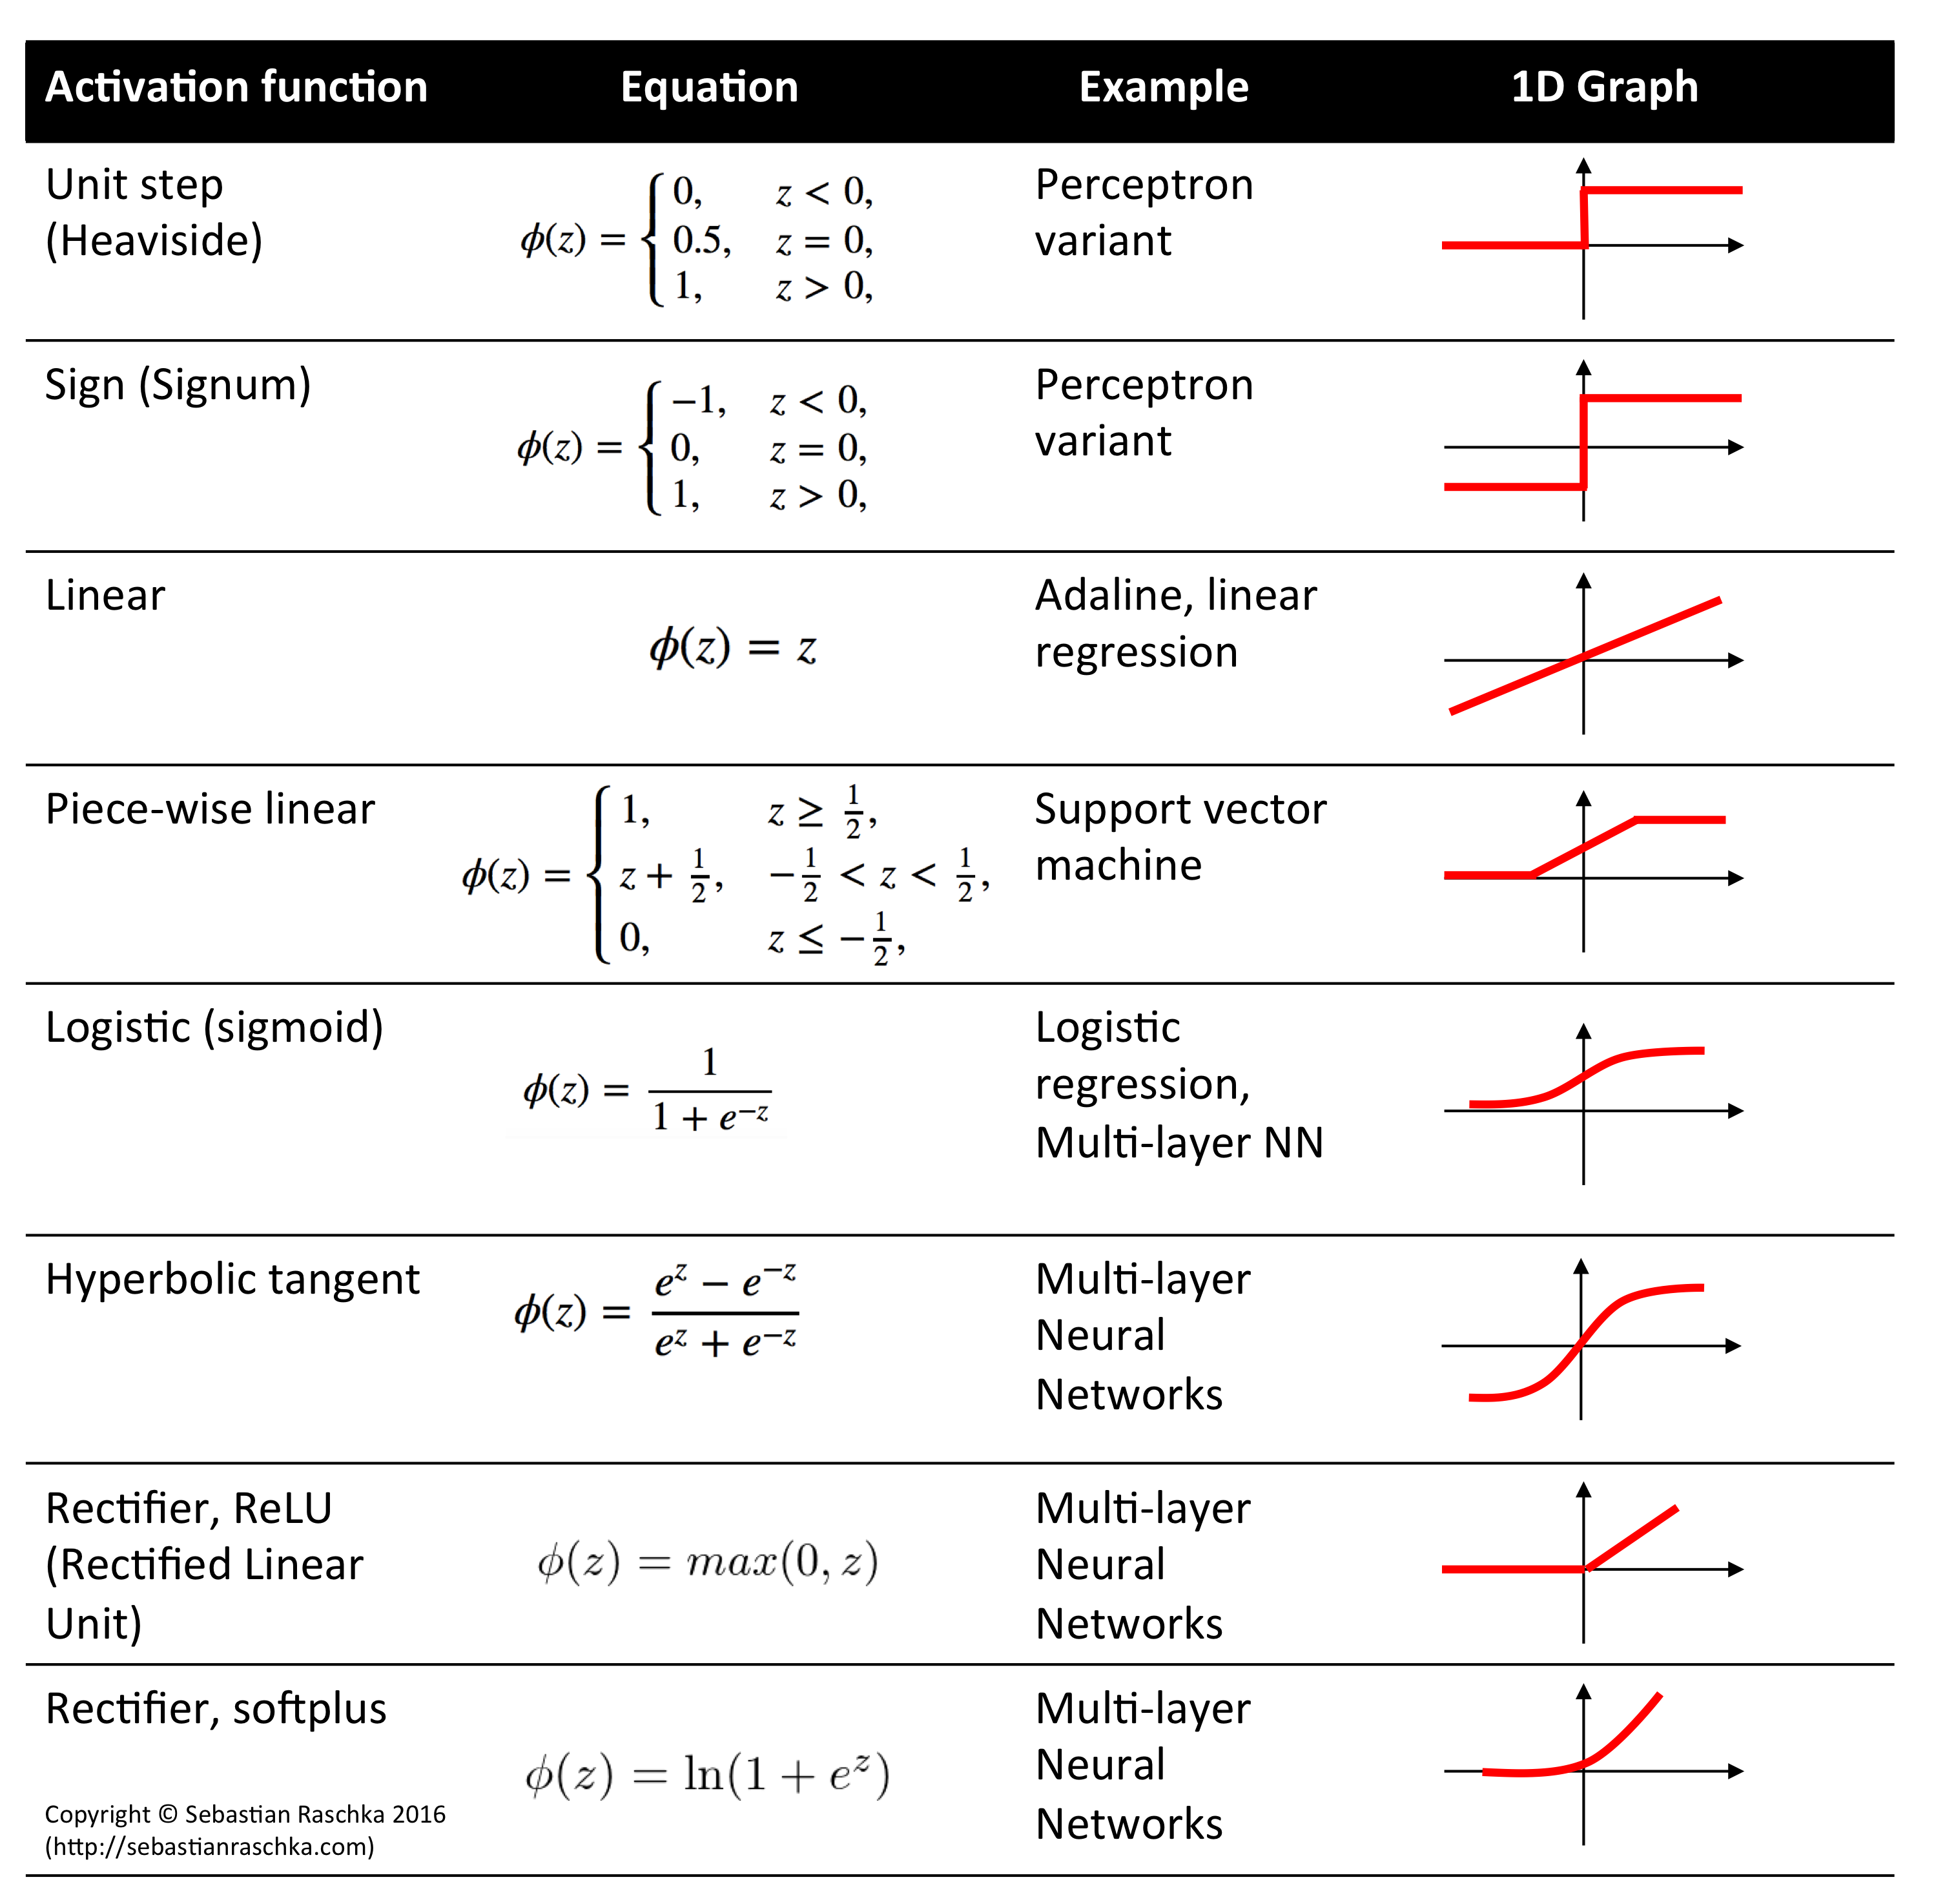

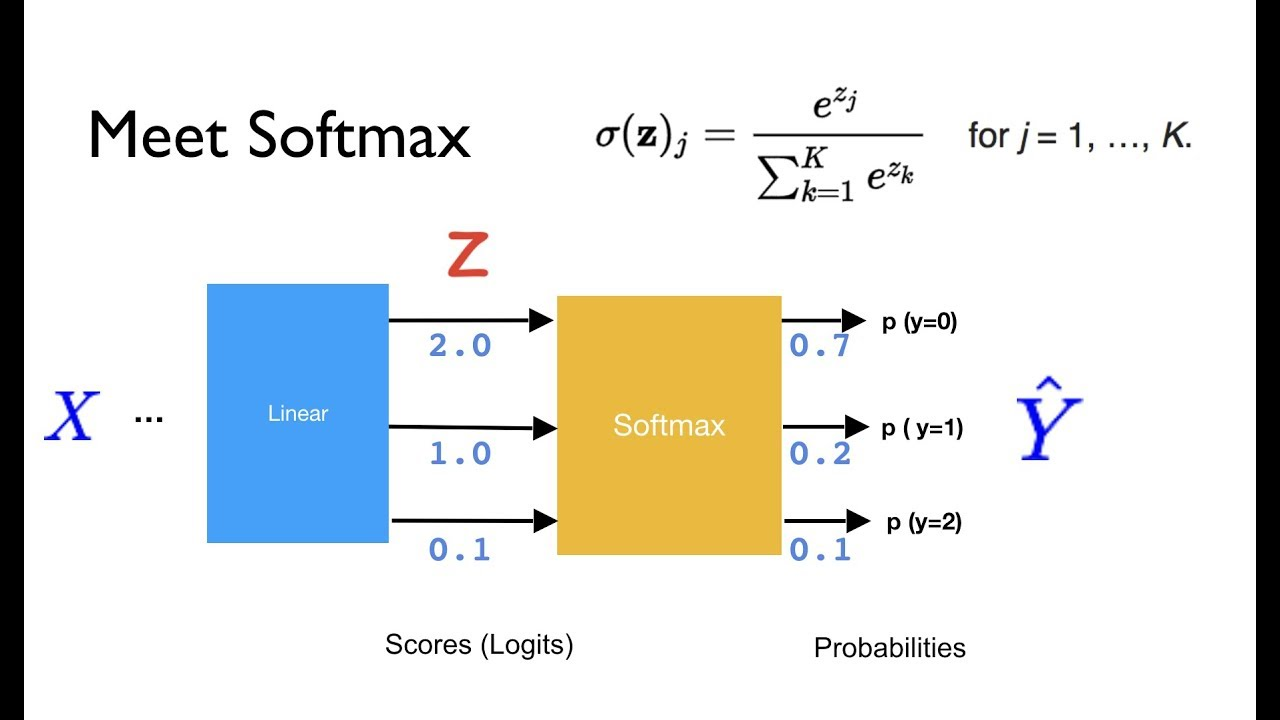

In [ ]:
# option 1 using activation function while forming the architecture of the NN
# binary classifier so o/p size is always 1
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.sigmoid

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out

#option 2 using activation function in the forward pass
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out = torch.relu(self.linear1(x))
    out = torch.sigmoid(self.linear2(out))
    return out